## Linear regression

A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the *intercept or bias term*

Can be expressed in vector form:

\begin{equation*}
\hat{y} = \theta \cdot x
\end{equation*}

* Where $\theta$ is the parameter vector, also containing the bias term and all feature weights.
* $x$ is the feature vector, $x_0$ to $x_n$, with $x_0$ always equal to 1
* A prediction is $\hat{y} = \theta^Tx$ -> will result in a single value (Transpose becomes a row vector multiplcation)


**How do we train this model?**

* Find parameters such that this model best fits the training dataset
* We need a metric on which to optimize -> most common performance metric is MSE (Mean Squared Error)
* We need to find the value of $\theta$ that minimizes the *MSE*


Calculated as:
$mean(sum(predictions - actuals)^2)$


**Normal equation**
To find the value of $\theta$ that minimizes the cost function, there is a mathematical formula that gives this directly.

$\hat\theta = (X^TX)^-1 \cdot X^T y$

Can try this out on some real data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

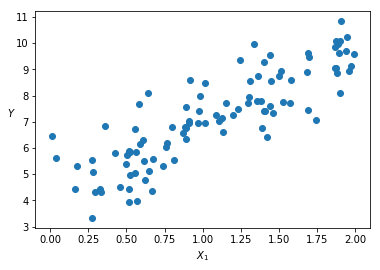

In [2]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.set_ylabel(r"$Y$", rotation=0)
ax.set_xlabel(r"$X_1$");

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # X_0, X_1
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
print(theta) # remember data generating function params were = 4, 3, so we are close.

[[4.26661203]
 [2.71565364]]


In [5]:
# Lets make some predictions on some new data X_new
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # X_0, X_1
print(X_new)
print()

y_predict = X_new_b.dot(theta)
print(y_predict)

[[0]
 [2]]

[[4.26661203]
 [9.6979193 ]]


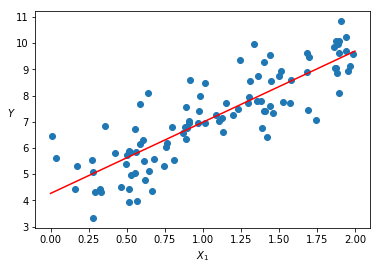

In [6]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X_new, y_predict, "r-")
ax.set_ylabel(r"$Y$", rotation=0)
ax.set_xlabel(r"$X_1$");

Of course doing this in sklearn is simpler:

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X_new)

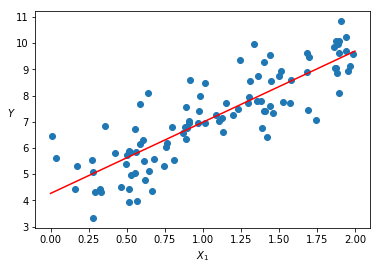

In [8]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X_new, preds, "r-")
ax.set_ylabel(r"$Y$", rotation=0)
ax.set_xlabel(r"$X_1$");

## Gradient descent
Now we take a look at a different way to train a linear regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

*Gradient descent* is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems.**The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function**.

**Summary**
Start by filling $\theta$ with random values (random initialization). You then improve it gradually, taking one step at a time, with each step attempting to decrease the cost function (the MSE), untill the algorithm converges to a minimum.

<img src="imgs/gradient_descent_1.png" width=500 height=500 />

An important parameter is the **learning rate**, if the learning rate is too small then it takes too long to converge, on the other hand if the learning rate is too high, you can jump too far at the next step and go past the minimum.

Also important, if the cost function is not convex (bowl shaped) then you can end up converging at a local minimum, not the global minimum.

<img src="imgs/gradient_decesent_2.png" width=500 height=500 />

When using gradient descent it is important that all features have the same scale. If features are on the same scale, the algorithm will reach the minimum far quicker than if the features are widely different in scale. (See plot below). The reason for this is that since feature 1 is smaller, it takes a larger change in $\theta_1$ to affect the cost function, which is why the bowl is elgongated along the $\theta_1$ axis.

<img src="imgs/gradient_descent_3.png" width=500 height=500 />

### Batch gradient descent

To implement, compute the gradient of the cost function with regard to each model parameter $\theta_j$. (how much will the cost function change if you change $\theta_j$ a little bit). This is called a partial derivative. 

*We can calculate all partial derivatives in one go using the formula below.*


$\nabla_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$

*Intuition: For each parameter in $\theta$, tweak its parameter value (remember we initialize these with random values), calculate the partial derivative with respect to MSE (what is the impact of changing one parameter value, holding all others constant, on MSE). Result is a column vector filled with partial derivatives for each parameter in $\theta$.*

Once we have the gradient vector, which will point uphill, we can go in the opposite direction by subtracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ is applied. Multiply the gradient vector by the learning rate to determine the size of the downhill step.

$\theta^{next step} = \theta - \eta\nabla_\theta MSE(\theta)$


*Intuition: **gradient vectors always point in the direction of the greatest increase to a function**. We want to move in a direction opposite to that (moving towards zero). Starting at $\theta$ (random initialized) -> how to move downwards -> go opposite to this = $\theta$ - gradient vector*

In [9]:
learning_rate = 0.1 #(\eta)
n_iterations = 1000 
m = 100 # len(X_b)

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradients

In [10]:
print(theta) # our parameter values

[[4.26661203]
 [2.71565364]]


In [11]:
print(X_new_b) # our new observations

[[1. 0.]
 [1. 2.]]


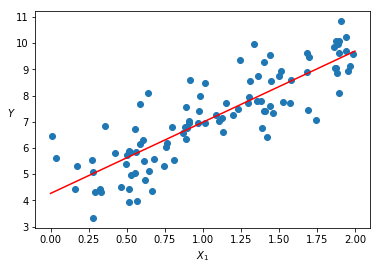

In [12]:
y_predict = X_new_b.dot(theta) # predictions

fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X_new, y_predict, "r-")
ax.set_ylabel(r"$Y$", rotation=0)
ax.set_xlabel(r"$X_1$");

We achieved the same result as the normal equation. 

## Stochastic Gradient Descent

The main issue with Batch Gradient Descent is that it uses the whole training set to compute the gradients at every step. For large datasets this can make the algorithm very slow. 

Stochastic gradient descent picks random observations from the training set at each round and computes the gradients based on that single instance. The benefits of this means:
* We can train massive datasets quickly
* Due to randomness, cost function will jump around alot. This can help to get out of local minimum. But at the same time means it will never reach an absolute minimum (but will do a pretty good job).

One solution to this is to gradually decrease the learning rate. Steps start out large, which means the algorithm jumps around more, and is more likely to escape local minima. As iterations increase, learning rate decreases allowing us to hone in on a global minimum (step sizes stops jumping around so much).

*Note: make sure to ensure that training dataset is IID -> should have no order -> so shuffle it first*

Cost function will jump around more but training is faster. theta1, theta2 before and after parameter changes.

<img src="imgs/stochastic_gradient_descent_1.png" width=300 height=300 />

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[4.25960254]
 [2.76342088]]


To do linear regression with Stochastic gradient descent, we can use the SGDRegressor() from sklearn.

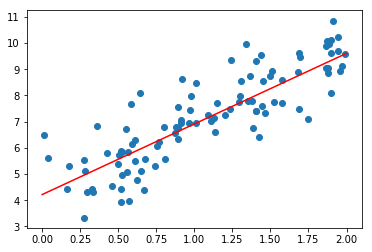

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.1)
sgd_reg.fit(X, y.ravel())
preds = sgd_reg.predict(X_new)

fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X_new, preds, 'r-');

## Polynomial regression

Fitting linear models to non linear data - simply add powers of the features as new feaures.

In [15]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X+2 + np.random.randn(m, 1)

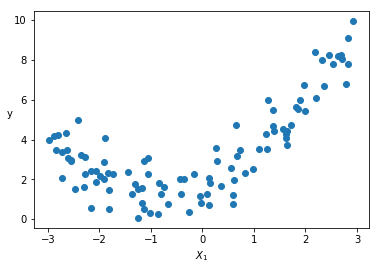

In [16]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.set_ylabel("y", rotation=0)
ax.set_xlabel(r"$X_1$");

We can fit polynomial regressions using regular LinearRegression but feed it polynomial features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0]) # squared column added

[-0.75275929]
[-0.75275929  0.56664654]


[[0.93366893 0.56456263]]
[1.78134581]


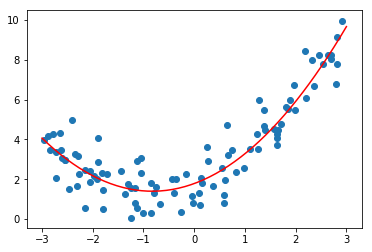

In [18]:
lr = LinearRegression()
lr.fit(X_poly, y)
print(lr.coef_) # x1^2, x1
print(lr.intercept_) # intercept

# New data (linspace gives evenly spaced observations over a min, max range)
X_new = np.linspace(-3, 3, num=50).reshape(-1, 1)
X_new_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_new)
preds = lr.predict(X_new_poly)

# Plot
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X_new, preds, 'r-');


## Learning curves

Performing high degree polynomial regression, you are likely to overfit the model. (increase complexity = increase variance).

We can see below, fitting a model with features to the 300th polynomial degree causes severve overfitting.

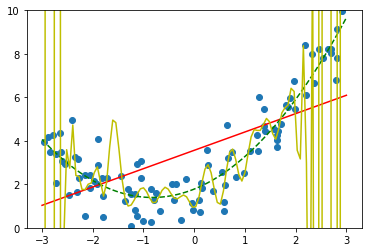

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def fit_predict_poly(X, y, poly):    

    polynomial = PolynomialFeatures(degree=poly, include_bias=False)
    scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polynomial),
            ("std_scaler", scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    preds = polynomial_regression.predict(X_new)

    return X_new, preds

# Plot
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)

X_new, preds = fit_predict_poly(X, y, 1)
ax.plot(X_new, preds, 'r-')

X_new, preds_2 = fit_predict_poly(X, y, 2)
ax.plot(X_new, preds_2, 'g--')

X_new, preds_300 = fit_predict_poly(X, y, 300)
ax.plot(X_new, preds_300, 'y-')
ax.set_ylim(0, 10);

We can of course use cross validation to determine whether we are overfitting (for example seeing good scores on training data, poor scores on test data). Another way is to use learning curves. 

**Learning curves are plots of model performance on train/test data as a function of training set size.**

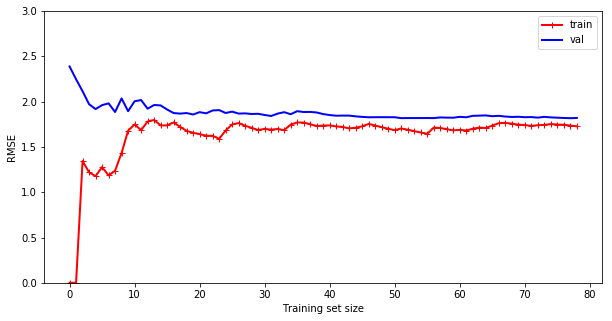

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="train")
    ax.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    ax.set_ylabel("RMSE")
    ax.set_xlabel("Training set size")
    ax.legend(loc='upper right')
    ax.set_ylim(0, 3)
    
plot_learning_curves(LinearRegression(), X, y)  

Explaining the curves:

Starting with the training error -> when there are just one or two observations the model is able to fit that perfectly, which is why the curve starts at zero. As we add information it becomes impossible to fit perfectly as the data is noisy and X is not linear (we have done no polynomial transforms yet). So we see RMSE increasing untill it reaches a point where adding new observations doesn't make it better or worse. 

The validation error, as we have a few observations at the start, we are unable to generalize well enough for new data, so RMSE is large. As we increase observations, validation error begins to decrease as the added information to the model makes us able to model new data well. But of course, a straight line can only fit the data so well, so the RMSE reaches a plateus close to the training data.

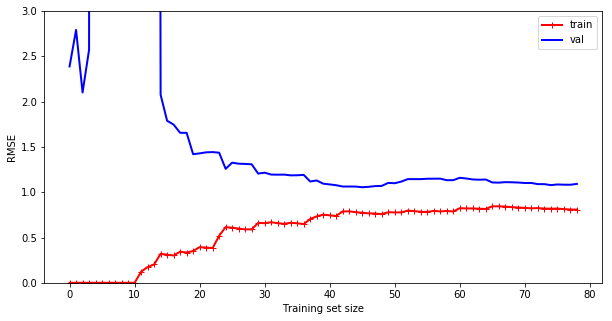

In [21]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)  

The difference between the two plots: With this higher order model, we see that training RMSE is lower (better fit), but the gap between training and test error is wider, suggesting that we are infact overfitting. 

## The bias-variance trade off

**Bias**: Error from incorrect assumptions -> for example linear relationship, when actually it is quadratic. High bias models likely to underfit training data.

**Variance**: Error from over sensitivity to small variations in training data. For example fitting a high order polynomial regression to a simple curve, will have high variance likely be overfitting the training data.

**Irreducible error**: Error from noisiness of data itself. Only way to reduce this is improve the data passed to the model.

## Regularized Linear Models

A good way to reduce overfitting is to contrain the model (regularization). With a linear model we can achieve this by constraining the weights of the model. 

### Ridge regression

Linear regression with a regularization term equal to $\alpha\sum^n_i\theta^2_i$ which is added to the cost function. 

This forces the model to fit the data, but keep the coeficients as small as possible.

The hyperparameters $\alpha$ determines how much you want to contrain the model. If $\alpha$ = 0 then it is just linear regression. if $\alpha$ is very large, then all weights will be practically zero, and you just have a straight line equal to the intercept.


$J(\theta) = MSE(\theta) + \alpha\sum^n_{i=1}\theta^2_i$


*Note! Regularization is not applied to the intercept (thus i starts at 1, not 0).*


**Closed form solution**

$\hat\theta = (X^TX + \alpha A)^{-1} \cdot X^T \cdot y$

where A is the identity matrix, with zero in top left most cell (for bias term).

In [22]:
from sklearn.linear_model import Ridge

Text(0.5,1,'polynomial = 10')

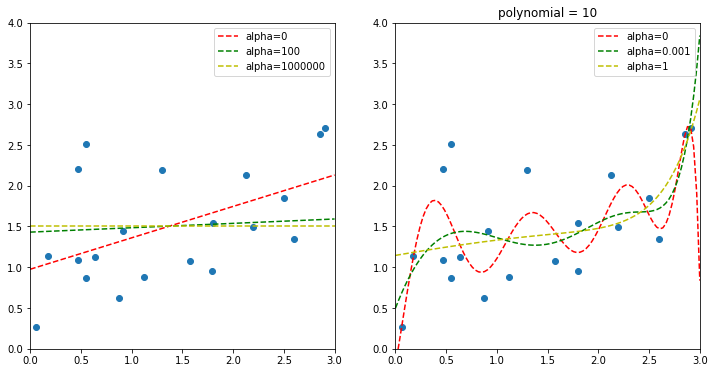

In [23]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(X, y)

for alpha, style in zip([0, 100, 10**6], ["r--", "g--", "y--"]):
    rr = Ridge(alpha=alpha)
    rr.fit(X, y)
    preds = rr.predict(X_new)
    ax.plot(X_new, preds, style, label=f"alpha={alpha}")
ax.axis([0, 3, 0, 4])
ax.legend()


ax2.scatter(X, y)
for alpha, style in zip([0, 0.001, 1], ['r--', "g--", "y--"]):
    rr_poly = Pipeline([
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("scaler", StandardScaler()),
            ("lin_reg", Ridge(alpha=alpha))
    ])
    rr_poly.fit(X, y)
    preds = rr_poly.predict(X_new)
    ax2.plot(X_new, preds, style, label=f"alpha={alpha}")

ax2.axis([0, 3, 0, 4])
ax2.legend()
ax2.set_title("polynomial = 10")

We can see that as we increase alpha, we end up with flatter lines and in the case of the polynomial model, smoother curves.

## Lasso Regression

Is another regularized version of Linear Regression, but unlike Ridge Regression which uses the l2 norm of the weight vector, lasso uses the l1 norm.

$J(\theta) = MSE(\theta) + \alpha\sum^n_{i=1} |\theta_i|$

A key characteristic of the Lasso is that it tends to eliminate the weights of least important features (i.e set them to zero) - so it automatically performs feature selection by outputting a sparse model (model with few non-zero features).

In [24]:
from sklearn.linear_model import Lasso

Text(0.5,1,'polynomial = 10')

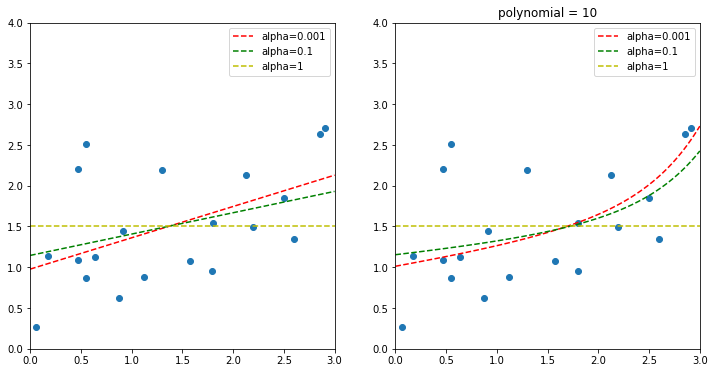

In [25]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(X, y)

for alpha, style in zip([0.001, 0.1, 1], ["r--", "g--", "y--"]):
    rr = Lasso(alpha=alpha, tol=1)
    rr.fit(X, y)
    preds = rr.predict(X_new)
    ax.plot(X_new, preds, style, label=f"alpha={alpha}")
ax.axis([0, 3, 0, 4])
ax.legend()


ax2.scatter(X, y)
for alpha, style in zip([0.001, 0.1, 1], ['r--', "g--", "y--"]):
    rr_poly = Pipeline([
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("scaler", StandardScaler()),
            ("lin_reg", Lasso(alpha=alpha, tol=1))
    ])
    rr_poly.fit(X, y)
    preds = rr_poly.predict(X_new)
    ax2.plot(X_new, preds, style, label=f"alpha={alpha}")

ax2.axis([0, 3, 0, 4])
ax2.legend()
ax2.set_title("polynomial = 10")

## Elastic Net

A combination of ridge and lasso. when r=0, Elastic Net is equivalent to Ridge Regression, when r=1 then it is equivalent to Lasso Regression. 

When should you use the different regression techniques, vanilla, Ridge, Lasso, Elastic net?:
* Generally it is always good to have some regularization -> so Ridge is a good default.
* If you suspect you have a few features that are actually useful -> Lasso
* Elastic Net is preferred over Lasso when number of features is greater than training observations, or when several features are strongly correlated. 

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # 50/50 split, regularization = 0.1
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Logistic Regression

Used to estimate the probability that a certain observation belongs to a specific class -> is this email spam? if probabilty more than 50% then yes else no - > such an example is of a binary classifier.

Logistic regression works just like Linear Regression, we calculate optimal parameter weights that minimize a cost function, but instead of directly outputting the results (the sum of all parameters * weights + bias term), it outputs the *logistic* of this result.

$\hat p = h_\theta(x) = \sigma(X^T\theta)$ 

where $\sigma$ is a sigmoid function that will output a number between 0 and 1.

$\sigma(t) = \frac{1}{1 + exp(-t)}$

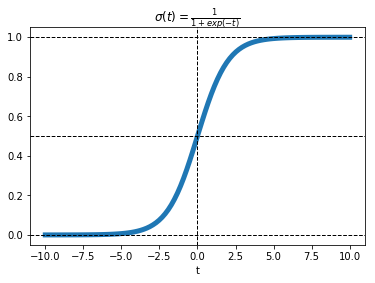

In [27]:
X = np.linspace(-10, 10, num=100)
y = 1 / (1 + np.exp(-X))

fig, ax = plt.subplots(1, 1)
ax.plot(X, y, lw='5')
ax.axvline(0, c='k', ls='--', lw='1')
ax.axhline(1, c='k', ls='--', lw='1')
ax.axhline(0, c='k', ls='--', lw='1')
ax.axhline(0.5, c='k', ls='--', lw='1')
ax.set_xlabel("t")
ax.set_title(r"$\sigma(t) = \frac{1}{1 + exp(-t)}$");

**Logistic regression estimated probability**

$\hat p = h_\theta(x) = \sigma(X^T\theta)$ 

**Logistic function**

$\sigma(t) = \frac{1}{1 + exp(-t)}$


**Logistic regression cost function (log loss)**

$J(\theta) = -\frac{1}{m}\sum^m_{i=1}[y^{(i)} \cdot log(\hat{p}^{(i)}) + (1 - y^{(i)})\cdot log(1- \hat{p}^{(i)})]$


**Logistic regression cost function partial derivative**

$\frac{\delta}{\delta\theta_j} J(\theta) = \frac{1}{m}\sum^m_{i=1} (\sigma(\theta^Tx^{(i)}) - y^{(i)}x^{(i)}_j$

Lets have a go at coding these using an artificially generated classification dataset

In [28]:
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns;

/Users/rory.vigus/.virtualenvs/dev/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# Get only class 0, 1 and all features.
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=2)

y = y[:, np.newaxis]

In [30]:
X.shape, y.shape

((100, 2), (100, 1))

In [31]:
def sigmoid(t):
    return 1.0 / (1 + np.exp(-t))

def cost(X, y, theta):
    """
    Calculate logistic cost function (eq.4-17)
    
    """
    # Observations
    m = len(y)
    
    # Get prediction for each observation
    probas = sigmoid(np.matmul(X, theta)) # col_vector
    
    # Calculate cost
    cost = -1 * (np.matmul(y.T, np.log(probas)) + np.matmul(1-y.T, np.log(1-probas))) / m
    
    return cost

def gradient_descent(X, y, theta, learning_rate):
    """
    Calculate gradient for single step (eq: 4-18)
    
    """
    
    m = len(y)
    p = sigmoid(np.matmul(X, theta))
    predictions = p - y
    gradient = np.matmul(X.T, predictions) / m
    theta = theta - learning_rate * gradient
    
    return theta


# Optimization loop
learning_rate = 0.02
n_iterations = 1000 
m = len(y)

# Add constant
X_b = np.c_[np.ones((len(X), 1)), X] # X_0, X_1, X_4
theta = np.random.randn(X_b.shape[1], 1)

costs = []
for iteration in range(n_iterations):
    theta = gradient_descent(X_b, y, theta, learning_rate)
    costs.append(cost(X_b, y, theta)[0])

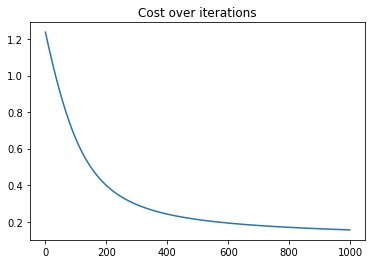

In [32]:
fig, ax = plt.subplots(1, 1)
ax.plot(costs)
ax.set_title("Cost over iterations");

Now we have our optimal theta values, we can try and plot the decision boundary using two features from X.

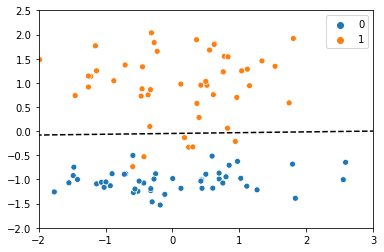

In [33]:
fig, ax = plt.subplots(1, 1)

X_1 = X_b[:, 1]
X_2 = X_b[:, 2]

sns.scatterplot(x=X_1, y=X_2, hue=y.ravel(), ax=ax)

# Decision boundary is the set of points where
# theta0 + theta1.x1 + theta2.x2 = 0
# x2 in our case is on the yaxis. So solve for y.
x_vals = np.array(ax.get_xlim())
y_vals = (theta[1]*x_vals - theta[0]) / theta[2]
ax.plot(x_vals, y_vals, 'k--')
ax.axis([-2, 3, -2, 2.5]);

### Logistic regression - continued - iris dataset

Lets apply some techniques on the iris dataset. 

We can attempt binary classification, using a single feature, for a single iris type (iris virginica).

Then we can have a look at softmax for multi-class predictions.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()
X = iris["data"][:, 3:] # Petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

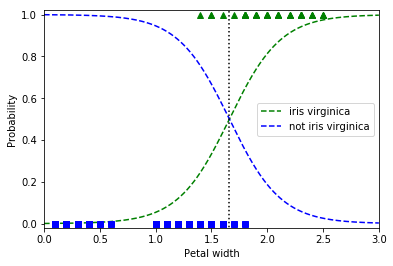

In [36]:
# Fit a model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Estimated probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
fig, ax = plt.subplots(1, 1)

# Plot s-curves
ax.plot(X_new, y_proba[:, 1], "g--", label="iris virginica")
ax.plot(X_new, y_proba[:, 0], "b--", label="not iris virginica")

# Plot decision boundary
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
ax.plot([decision_boundary, decision_boundary], [-1, 2], "k:")

# Plot actuals
ax.plot(X[y==0], y[y==0], "bs")
ax.plot(X[y==1], y[y==1], "g^")

ax.axis([0, 3, -0.02, 1.02])
ax.set_xlabel("Petal width")
ax.set_ylabel("Probability")
ax.legend();

The plot shows estimated probabilities for each class (Iris virginica=Yes, Iris virginica=No) according to Petal Width. The dotted vertical black line is the point at which p>0.5 or p<0.5, and will decide which class the observation is classified too. 

Again, how to show the decision boundary between two features.

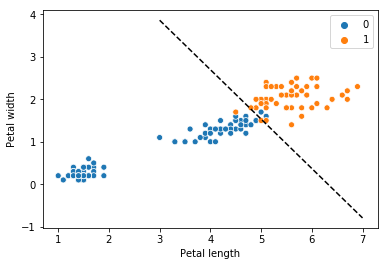

In [37]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# Note logistic regression automatically applied regularization via parameter C 
# (the higher C, the lesser regularization).
log_reg = LogisticRegression(C=1.0) 
log_reg.fit(X, y)

fig, ax = plt.subplots(1, 1)
sns.scatterplot(X[:, 0], X[:, 1], hue=y.ravel(), ax=ax)
ax.set_ylabel("Petal width")
ax.set_xlabel("Petal length")

# theta0 + theta1x1 + theta2x2 = 0
# (theta1*x1 - theta0) / theta2
x_min_max = np.array([3, 7])
boundary = -(log_reg.coef_[0][0] * x_min_max + log_reg.intercept_[0]) / log_reg.coef_[0][1]

# plt.clabel(contour, inline=1, fontsize=12)
ax.plot(x_min_max, boundary, "k--")

### Softmax regression or (Multinomial logistic regression)

When given an instance $\mathbf{x}$ the softmax regression model computes a score $s_k(\mathbf{x})$ for each class k, then estimates the probability of each class by applying the softmax function to the scores.

$s_k(\mathbf{x}) = \mathbf{x}^T\theta^{(k)}$

Note that each class has its own parameter vector $\theta^k$, generally stored as rows in a parameter matrix $\Theta$

For an instance $\mathbf{x}$, once the scores have been calculated for each class, you can estimate the probability $\hat p_k$ that the instance belongs to class k by running the scores through the softmax function.

$\hat p_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{exp(s_k(\mathbf{x})}{sum^K_{j=1}exp(s_j(\mathbf{x}))}$

here:
* k = number of classes
* s(x) is a vector containing the scores of each class for the instance x
* $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the esitmated probability that the instance x belongs to class k, given the scores of that instance.

To get a prediction, find the class with the highest probability.

**Training a model**

Cost function (called Cross entropy cost function) is given by:

$J(\Theta) = -\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y^{(i)}_klog(\hat p^{(i)}_k)$

The gradient vector for class k:

$\nabla_{\theta^k}J(\Theta) = \frac{1}{m}\sum^m_{i=1}(\hat p^{(i)}_k - y^{(i)}_k)\mathbf{x}^{(i)}$


We can compute the gradient vector for every class, then use gradient descent to the parameter matrix $\Theta$ that minimizes the cost function.

In [103]:
X = iris["data"][:, (2, 3)] # two features.
y = iris["target"] # three classes
print(set(y))
y = y[:, np.newaxis]

# add constant term
X_b = np.c_[np.ones(len(X)), X]
print(X_b.shape)

{0, 1, 2}
(150, 3)


In [104]:
# Initialize the parameter matrix
param_matrix = np.random.randn(X_b.shape[1], len(np.unique(y)))
print(param_matrix)
print(param_matrix.shape)

[[-0.20969244 -0.77404293 -0.35977815]
 [ 0.72408325 -0.25576464  0.8499212 ]
 [-1.31132423 -0.87030495 -0.50664322]]
(3, 3)


In [105]:
# Step 1: Get the softmax score for each class k
# For each instance, multiply feature values by weights, repeat for all classes.
# Result will be N, K score matrix.
def calc_scores(X, param_matrix):
    return np.matmul(X_b, param_matrix)

scores = calc_scores(X_b, param_matrix)
print(scores.shape)

(150, 3)


In [106]:
# Step 2: Pass all scores through the softmax function
# Converts scores to probabilities.
# scores.T = shape 3, 150 -> this will divide each score in each class by the sum of exponentials in that class.
def calc_probs(scores):
    return (np.exp(scores.T) / np.sum(np.exp(scores), axis=1)).T

probs = calc_probs(scores)
print(probs.shape)

(150, 3)


In [107]:
# Create a new array that has been one-hot encoded (column has a 1 if class=True, else zero)
# We do this so that we can easily use matrix multiplication instead of looping over each class in y.
from sklearn.preprocessing import OneHotEncoder
y_enc = OneHotEncoder(sparse=False).fit_transform(y)
print(y_enc[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [108]:
def calc_cross_entropy(y_true, probs):
    return -np.mean(np.sum(y_true * np.log(probs), axis=1))

cross_entropy = calc_cross_entropy(y_enc, probs)
print(cross_entropy)

2.2723218559988814


In [109]:
def calc_gradient(y_true, probs, X):
    """
    eq: 4-23. For each class, observation, sum((p-y)*xi)/m
    
    """
    m = len(y_enc)
    return 1/m * np.dot(X_b.T, (probs - y_enc))

In [110]:
def gradient_descent(X, y, param_matrix, learning_rate):
    m = len(y)
    scores = calc_scores(X, param_matrix)
    probs = calc_probs(scores)
    gradient = calc_gradient(y, probs, X)
    param_matrix = param_matrix - learning_rate * param_matrix
    
    return param_matrix, probs

## PUTTING IT ALL TOGETHER
learning_rate = 0.02
n_iterations = 1000 
m = len(y)

# Add constant
X_b = np.c_[np.ones((len(X), 1)), X] # X_0, X_1, X_4
param_matrix = np.random.randn(X_b.shape[1], len(np.unique(y)))

costs = []
for iteration in range(n_iterations):
    param_matrix, probs = gradient_descent(X_b, y_enc, param_matrix, learning_rate)
    costs.append(calc_cross_entropy(y_enc, probs))    

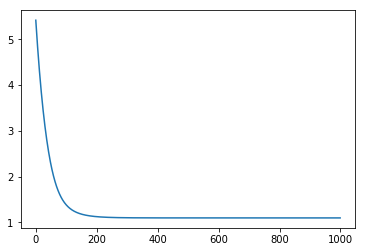

In [150]:
fig, ax = plt.subplots(1, 1)
ax.plot(costs);

In [112]:
param_matrix

array([[-2.20460425e-09,  4.95408944e-09, -1.84497955e-09],
       [ 1.53972045e-09, -1.12095828e-09, -8.64687577e-10],
       [ 5.07116438e-10, -2.45463637e-09, -1.11536695e-09]])

### in sklearn

In [94]:
from sklearn.linear_model import LogisticRegression

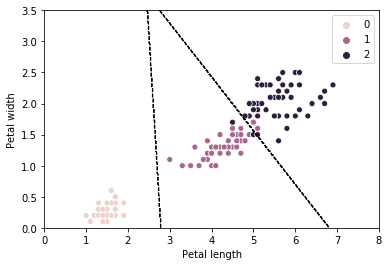

In [149]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Note logistic regression automatically applied regularization via parameter C 
# (the higher C, the lesser regularization).
soft_max_reg = LogisticRegression(multi_class="multinomial", C=1.0) 
soft_max_reg.fit(X, y)

fig, ax = plt.subplots(1, 1)
sns.scatterplot(X[:, 0], X[:, 1], hue=y.ravel(), ax=ax)
ax.set_ylabel("Petal width")
ax.set_xlabel("Petal length")


# Next plot the contour lines.
# Make a set of coordinates, according to min, max values of x, y axis
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
# combine them together to create our features
X_new = np.c_[x0.ravel(), x1.ravel()]

# Get the probs/preds for each observation
y_proba = soft_max_reg.predict_proba(X_new)
y_predict = soft_max_reg.predict(X_new)

# y_proba returns both probabilities, keep only positive.
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

ax.contour(x0, x1, zz, colors=['k'], linestyles=['--'], linewidths=[1]);

**Excercises:**

1) Which linear regression training algorithm can you use if you hvae a training set of a million features?

*We should probably use stochastic gradient descent. Batch gradient descent uses the whole training set at every iteration, with millions of features this is likely to be slow. Stochastic GD uses a random picked instance from X at each iteration to train the model.*

2) Suppose features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

*Gradient descent algorithms will be impacted by features of vastly different scales. Given two feature, X1 and X2, if X1 is much smaller compared to X2, it will take a greater change in X1 to impact the cost function. This can cause increased time to convergence for the GD algorithm. To fix, we can simply scale all features.*

3) Can gradient descent get stuck in local miniumum when training Logisitc Regression model?

*No, the cost function is convex so is guaranteed to find global minimum.*

4) Do all GD algorithms lead to the same model, provided you let them run long enough?

No, some algorithms can get stuck at local minima, instead of global minima, as not all cost functions will be convex. Stochastic gradient decesent is also not guaranteed to give you exactly the same result, as it will forever bounce around extremely close to the global minima but never reach it, as each time it optimizes on the next randomly picked instance. 

5) Suppose you use Batch Gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

*If validation error consistently goes up as you increase iterations, then the learning rate has been set too high and the algorithm is not converging. If training error is not going up, then that is evidence that you are overfitting. In such a case, you should stop training.*

6) Is it a good idea to stop Mini-batch GD immediately when the validation error goes up. 

*Mini-batch is a combo of SGD and BGD, the stochastic part can mean that the cost function may jump around a bit (upwards or downwards). So stopping immediately would be a bad idea as potentially it has likely not reached a minimum.*

7) Which algorithm will converge fastest? Which will actually converge?

*Stochastic gradient descent will converge fastest given the correct learning rate. However only BDG is guaranteed to reach global minimum given convex cost function.*

8) What does it mean if there is a large difference between training error and validation error on a learning curve plot?

*If validation error is much higher than training error then it means that you are overfitting the training dataset. Model is unable to generalize for new data. To fix this, reduce degrees of freedom of the model (feature selection), add a regularizition term to the model (will force parameters to remain small), or add more training data.*

9) Suppose you are using Ridge Regression and you notice that both training and validation error are close, and are high. Does the model suffer from high bias or high variance? Should you increase regularization or decrease regularization?

*In such a case the model suffers from high bias. This is the error from incorrect assumptions in modelling our data, so the error is consistent across both training and validation data. In this case we would want to relax or remove regularization.* 
